In [5]:
import causalpy as cp

from lifetimes import BetaGeoFitter
from lifetimes.plotting import (plot_period_transactions, 
    plot_calibration_purchases_vs_holdout_purchases, 
    plot_cumulative_transactions, 
    plot_incremental_transactions, 
    plot_transaction_rate_heterogeneity,
    plot_dropout_rate_heterogeneity)
from lifetimes.utils import summary_data_from_transaction_data
from lifetimes.utils import calibration_and_holdout_data
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases
from lifetimes.generate_data import beta_geometric_nbd_model_transactional_data

import pandas as pd

### Generate Synthetic Data

In [19]:
# Pretreatment_params
pre_params = {
    "a": 0.79, 
    "alpha": 4.41, 
    "b": 2.43, 
    "r": 0.24
}

post_params = {
    "a": 0.79, 
    "alpha": 4.41, 
    "b": 2.43, 
    "r": 0.24
}


pre_trtmnt_df = beta_geometric_nbd_model_transactional_data(T=365, observation_period_end="2023-1-1", freq="D", size=5000, **pre_params)
post_trtmnt_df = beta_geometric_nbd_model_transactional_data(T=100, observation_period_end="2023-4-1", freq="D", size=1000, **pre_params)

df = pd.concat([pre_trtmnt_df,post_trtmnt_df])

df

,customer_id,date
0,0,2022-01-01 00:00:00.000000000
1,0,2022-10-23 20:12:22.915814400
2,1,2022-01-01 00:00:00.000000000
3,2,2022-01-01 00:00:00.000000000
4,3,2022-01-01 00:00:00.000000000
...,...,...
3162,997,2022-12-29 07:06:11.539814400
3163,997,2023-03-02 14:28:05.744755200
3164,997,2023-03-11 08:10:24.481804800
3165,998,2022-12-22 00:00:00.000000000


<Axes: xlabel='date'>

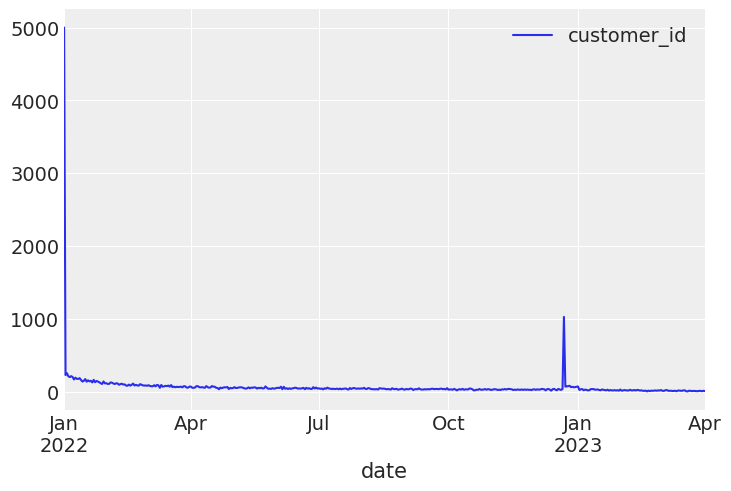

In [23]:
daily_df = df.resample("D", on="date").count()

daily_df.plot()

# All customers are starting on the same day. This can't be used!

### BG/NBD Modeling

In [24]:
# bgf = BetaGeoFitter()

# bgf.fit(data['frequency'], data['recency'], data['T'])

### CausalPy Synthetic Control